# OASIS INFOBYTE INTERNSHIP
## TASK-2
### Project Name : UNEMPLOYEMENT ANALYSIS WITH PYTHON 
### Intern : Pranavi Karnam
### Domain : Data Science

#### Introduction

Unemployment is a key economic indicator that reflects the health of a nation’s economy. Analyzing unemployment trends helps policymakers, businesses, and researchers understand labor market dynamics and economic conditions. This study utilizes Python to explore and visualize unemployment data in India, employing various analytical techniques to extract meaningful insights.

#### Technologies Used

Python: Programming language for data analysis.

Pandas: Data manipulation and analysis.

Matplotlib & Seaborn: Data visualization.

Jupyter Notebook: Interactive development environment.

#### Importing necessary libraries

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [264]:
file1_path = r"C:\Users\USER\Downloads\archive (4)\Unemployment in India.csv"
file2_path = r"C:\Users\USER\Downloads\archive (4)\Unemployment_Rate_upto_11_2020.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

df1.head()
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [266]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [268]:
df1.shape
df2.shape

(267, 9)

In [270]:
print("first sheet: ",df1.describe)
print("secound sheet: ",df2.describe)

first sheet:  <bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                  

In [272]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [274]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

#### Clean Column Names (Remove Extra Spaces)

In [277]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [279]:
df1.isnull().sum()
df2.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

#### Convert 'Date' Column to Proper Date Format

In [282]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

#### Handle Missing Values

In [285]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

#### Merge Both Datasets on Common Columns

In [288]:
common_columns = ['Region', 'Date', 'Estimated Unemployment Rate (%)', 
                  'Estimated Employed', 'Estimated Labour Participation Rate (%)']

df_merged = pd.concat([df1[common_columns], df2[common_columns]], ignore_index=True)

#### Analyze Unemployment Trends Over Time

In [291]:
df_trend = df_merged.groupby('Date').mean(numeric_only=True).reset_index()
df_trend

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,2019-05-31,8.874259,7.410148e+06,43.902963
1,2019-06-30,9.303333,7.358642e+06,43.750556
2,2019-07-31,9.033889,7.404425e+06,43.706667
3,2019-08-31,9.637925,7.539815e+06,43.646792
4,2019-09-30,9.051731,7.739464e+06,44.301346
5,2019-10-31,9.900909,7.298382e+06,44.001273
6,2019-11-30,9.868364,7.273661e+06,44.110545
7,2019-12-31,9.497358,7.377388e+06,43.667358
8,2020-01-31,9.702532,1.029704e+07,44.240633
9,2020-02-29,9.734810,1.019882e+07,43.873671


#### Plot Unemployment Rate Over Time

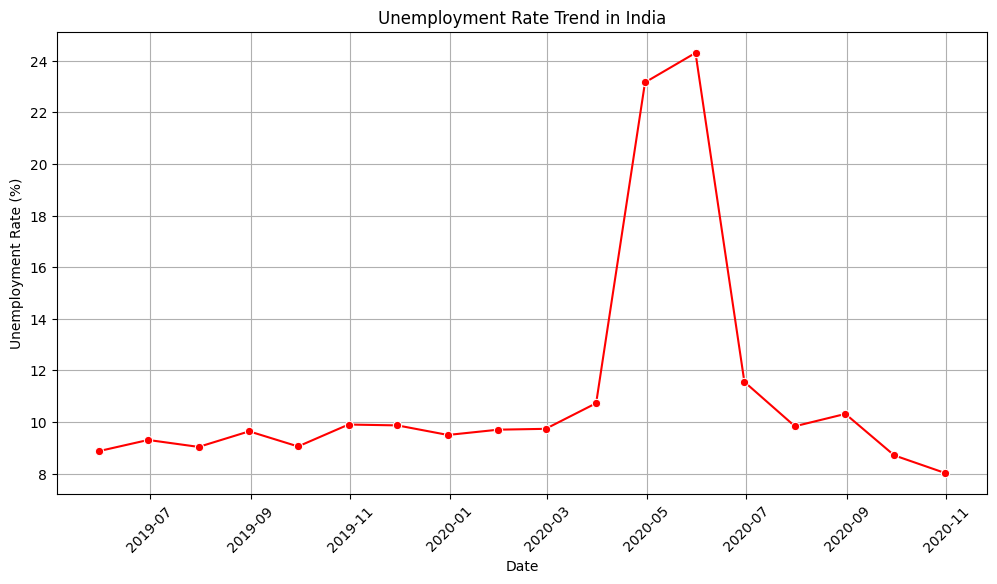

In [294]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df_trend, marker='o', color='red')
plt.title('Unemployment Rate Trend in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Insights from the Graph

##### Unemployment Trend Over Time 
Observation:
The unemployment rate fluctuates over time, showing both peaks and declines.
A significant spike is seen around mid-2020, due to the impact of COVID-19 lockdown.

- Economic crises (e.g., pandemics, recessions) directly impact unemployment.
Government interventions (job programs) help stabilize the job market over time.


#### Regional Unemployment Rate Distribution

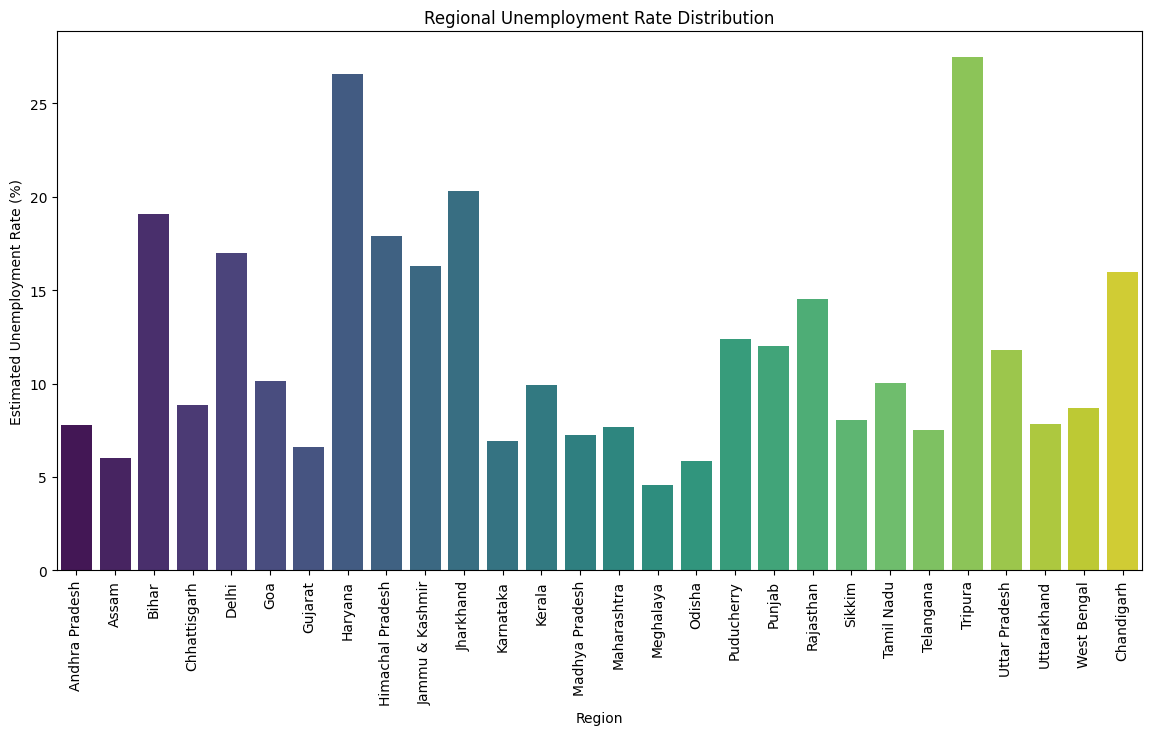

In [296]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df_merged, errorbar=None, palette='viridis', hue='Region', legend=False)
plt.xticks(rotation=90)
plt.title('Regional Unemployment Rate Distribution')
plt.show()

##### Regional Unemployment Rate Distribution

- Tripura & Haryana have the highest unemployment rates due to limited industrial growth, skill gaps, and rural dependency on agriculture.
- Meghalaya, with the lowest unemployment rate, benefits from self-employment, sustainable tourism, and government-backed rural job schemes.
- Encouraging skill development, industrial investment, and small business growth can help high-unemployment states improve job opportunities. 

#### Conclusion

This analysis provides valuable insights into unemployment trends in India. By leveraging Python and visualization techniques, we can better understand employment patterns and make data-driven decisions. 